## Project Objective

This project aims to explore coffee shop sales data with a special focus on temporal dimensions (date and time) to identify patterns and trends in consumer behavior.

<div style="
    display: table;
    margin: 0 auto;
    background-color: #086375;
    color: white;
    border-radius: 10px;
    border: 2px solid #086375;
    font-family: 'Montserrat', sans-serif;
    font-weight: 600;
    font-size: 16px;
    text-align: center;
    padding: 12px 16px;
">
Imports and Configuration
</div>


In [1]:
# :::::::::::::::::
# ::: Importing :::
# :::::::::::::::::
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap


# :::::::::::::::
# ::: Palette :::
# :::::::::::::::
palette = ["#3c1642","#223d5c","#086375","#139b93","#1dd3b0","#66e879","#affc41","#b1fe70","#b2ff9e"]


# ::::::::::::::::::::::
# ::: Importing data :::
# ::::::::::::::::::::::
df= pd.read_csv("/kaggle/input/coffe-sale/Coffe_sales.csv")
df.head(5)


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


<div style="
    display: table;
    margin: 0 auto;
    background-color: #086375;
    color: white;
    border-radius: 10px;
    border: 2px solid #086375;
    font-family: 'Montserrat', sans-serif;
    font-weight: 600;
    font-size: 16px;
    text-align: center;
    padding: 12px 16px;
">
Chart 1 – Distribution of Hours
</div>


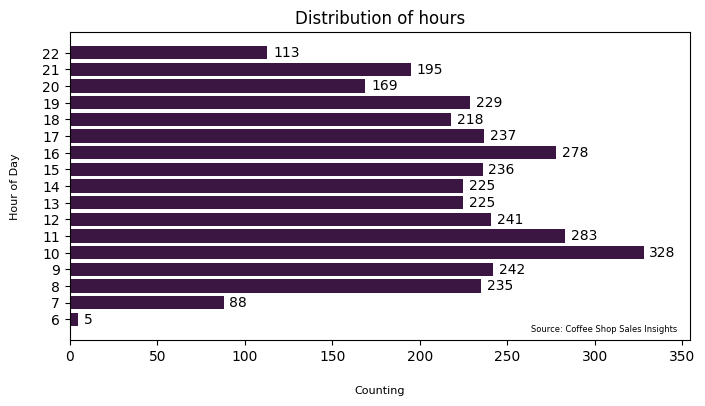

In [2]:
# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data preparation :::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Counting of hours
df_horario = df['hour_of_day'].value_counts().reset_index()

# Proportion
df_horario['proportion'] = df['hour_of_day'].value_counts(normalize=True).values * 100

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Visualization :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
fig, ax = plt.subplots(nrows=1, ncols=1, figsize= (8, 4))

barh_count = ax.barh(
    y= df_horario['hour_of_day'],
    width= df_horario['count'],
    color='#3c1642'

)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Text, Labels and Anotations ::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
box_label = dict(facecolor='#086375', pad=6, alpha=0.4)
ax.set_title("Distribution of hours", fontsize=12)
ax.set_ylabel("Hour of Day", fontsize=8, labelpad=16)
ax.set_xlabel("Counting", fontsize=8, labelpad=16)
ax.text(0.98, 0.02, 'Source: Coffee Shop Sales Insights', fontsize=6,
        transform=ax.transAxes, ha='right', va='bottom')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Value Labels and Ticks :::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
ax.bar_label(barh_count, padding=4)
plt.yticks(df_horario['hour_of_day'])

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Axis Limits Adjustment :::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
max_count = max(df_horario['count'])
ax.set_xlim(0, max_count * 1.08)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Render :::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.show()

<div style="
    display: table;
    margin: 0 auto;
    background-color: #086375;
    color: white;
    border-radius: 10px;
    border: 2px solid #086375;
    font-family: 'Montserrat', sans-serif;
    font-weight: 600;
    font-size: 16px;
    text-align: center;
    padding: 12px 16px;
">
Chart 2 - Sales Distribution by Weekday and Time of Day
</div>

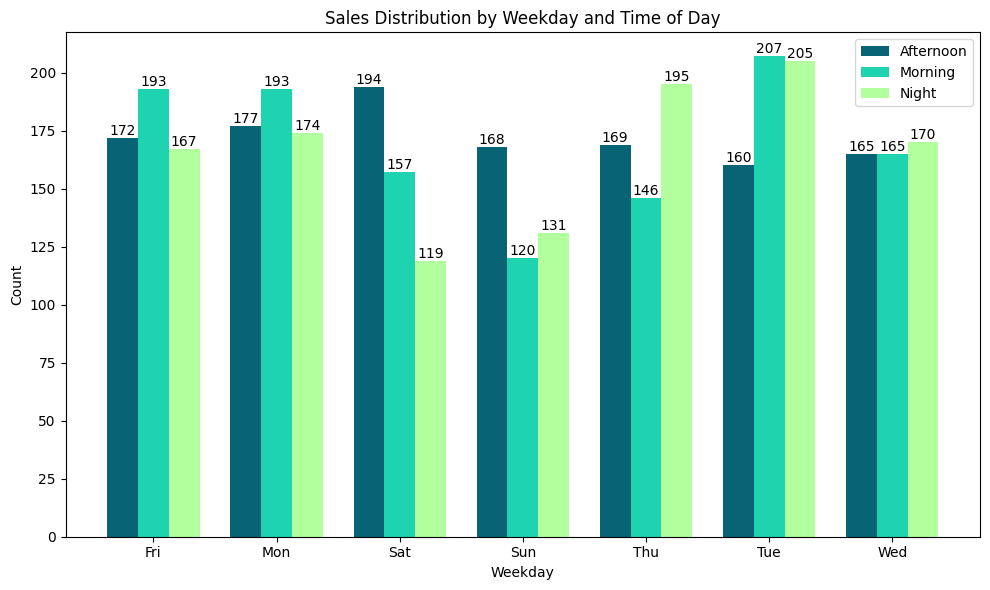

In [3]:
# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::: Data Aggregation :::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::

# Define weekday order
weekday_order = ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

# Create df3: Count sales by Weekday and Time_of_Day
df3 = df.groupby(['Weekday', 'Time_of_Day']).size().reset_index(name='count')

# Convert Weekday to categorical with custom order
df3['Weekday'] = pd.Categorical(df3['Weekday'], categories=weekday_order, ordered=True)

# Sort by Weekday
df3 = df3.sort_values('Weekday')

# Set multi-index for easier data extraction
df3 = df3.set_index(['Weekday', 'Time_of_Day'])

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Preparation :::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::

# Get data from df3
days = df3.index.get_level_values('Weekday').unique()
afternoon = df3.xs('Afternoon', level='Time_of_Day')['count'].values
morning = df3.xs('Morning', level='Time_of_Day')['count'].values
night = df3.xs('Night', level='Time_of_Day')['count'].values

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Visualization :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::

plt.figure(figsize=(10, 6))

# Bar positions
x = np.arange(len(days))
width = 0.25

# Create bars
bars1 = plt.bar(x - width, afternoon, width, label='Afternoon', color='#086375')
bars2 = plt.bar(x, morning, width, label='Morning', color='#1dd3b0')
bars3 = plt.bar(x + width, night, width, label='Night', color='#b2ff9e')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Value Labels and Ticks :::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::

# Add values on bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom')

for bar in bars3:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Text and Labels ::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::

plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Sales Distribution by Weekday and Time of Day')
plt.xticks(x, days)
plt.legend()

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Render :::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::

plt.tight_layout()
plt.show()

<div style="
    display: table;
    margin: 0 auto;
    background-color: #086375;
    color: white;
    border-radius: 10px;
    border: 2px solid #086375;
    font-family: 'Montserrat', sans-serif;
    font-weight: 600;
    font-size: 16px;
    text-align: center;
    padding: 12px 16px;
">
Chart 3 - Sales by Month
</div>


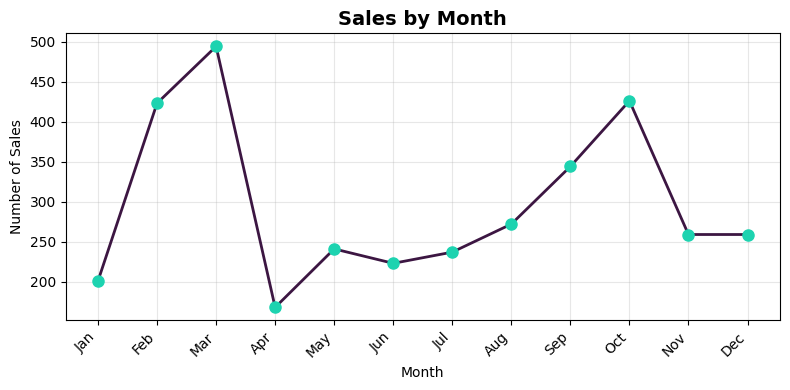

In [4]:
# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Preparation :::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Create a temporary DataFrame for sorting
df_temp = df['Month_name'].value_counts().reset_index()
df_temp.columns = ['Month_name', 'count']

# Add Monthsort column for ordering
df_temp = df_temp.merge(
    df[['Month_name', 'Monthsort']].drop_duplicates(), 
    on='Month_name'
)

# Sort by Monthsort
df4 = df_temp.sort_values('Monthsort').set_index('Month_name')['count'].reset_index()
months = df4.Month_name.values

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Visualization :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot line chart
ax1.plot(df4['Month_name'], df4['count'], 
         marker='o', 
         linewidth=2, 
         color='#3c1642',
         markersize=8, 
         markerfacecolor='#1dd3b0',
         markeredgecolor='#1dd3b0')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Text and Labels ::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
ax1.set_title('Sales by Month', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Sales')
ax1.set_xlabel('Month')
ax1.grid(True, alpha=0.3)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Axis Configuration :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.xticks(rotation=45, ha='right')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Render :::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.tight_layout()
plt.show()

<div style="
    display: table;
    margin: 0 auto;
    background-color: #086375;
    color: white;
    border-radius: 10px;
    border: 2px solid #086375;
    font-family: 'Montserrat', sans-serif;
    font-weight: 600;
    font-size: 16px;
    text-align: center;
    padding: 12px 16px;
">
Chart 4 - Sales Heatmap - Custom Palette
</div>


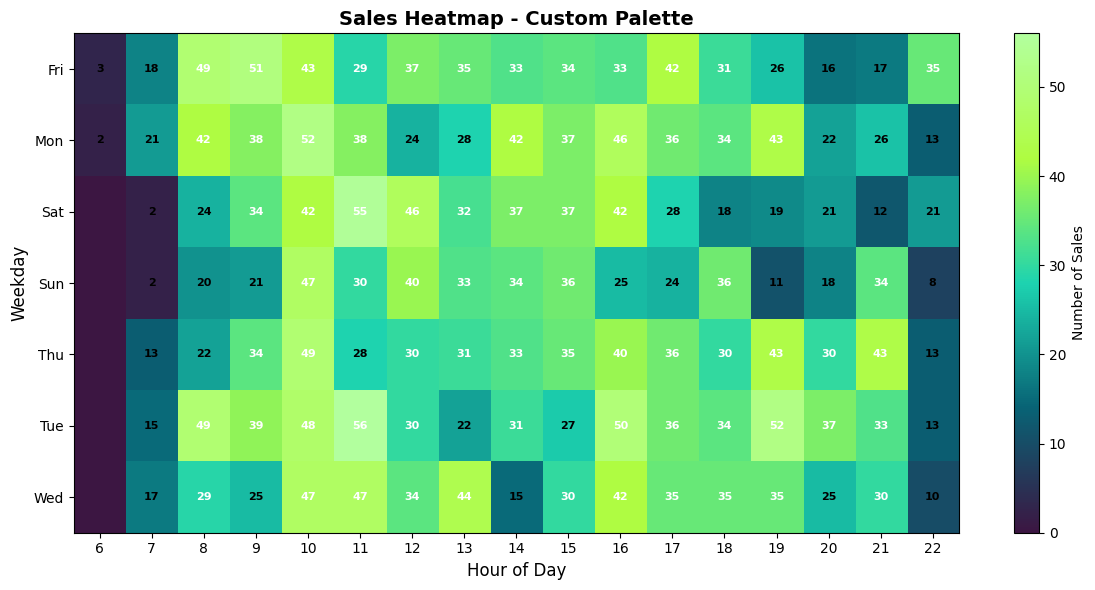

In [5]:
# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Color Map Preparation ::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Create custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", palette)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Preparation :::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Create heatmap data
heatmap_data = df.pivot_table(
    index='Weekday', 
    columns='hour_of_day', 
    values='money', 
    aggfunc='count',
    fill_value=0
)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Visualization :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(heatmap_data, cmap=custom_cmap, aspect='auto')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Cell Values and Annotations ::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Add values in cells
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        value = heatmap_data.iloc[i, j]
        if value > 0:
            # Choose text color based on cell brightness
            text_color = 'white' if value > heatmap_data.max().max() / 2 else 'black'
            ax.text(j, i, f'{int(value)}', 
                   ha='center', va='center', 
                   color=text_color, 
                   fontsize=8,
                   fontweight='bold')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Color Bar and Labels :::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.colorbar(im, ax=ax, label='Number of Sales')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Axis Configuration :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels(heatmap_data.columns)
ax.set_yticks(range(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Text and Titles ::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
ax.set_title('Sales Heatmap - Custom Palette', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Weekday', fontsize=12)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Render :::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.tight_layout()
plt.show()

<div style="
    display: table;
    margin: 0 auto;
    background-color: #086375;
    color: white;
    border-radius: 10px;
    border: 2px solid #086375;
    font-family: 'Montserrat', sans-serif;
    font-weight: 600;
    font-size: 16px;
    text-align: center;
    padding: 12px 16px;
">
Chart 5 - Peak Hours by Coffee Type
</div>


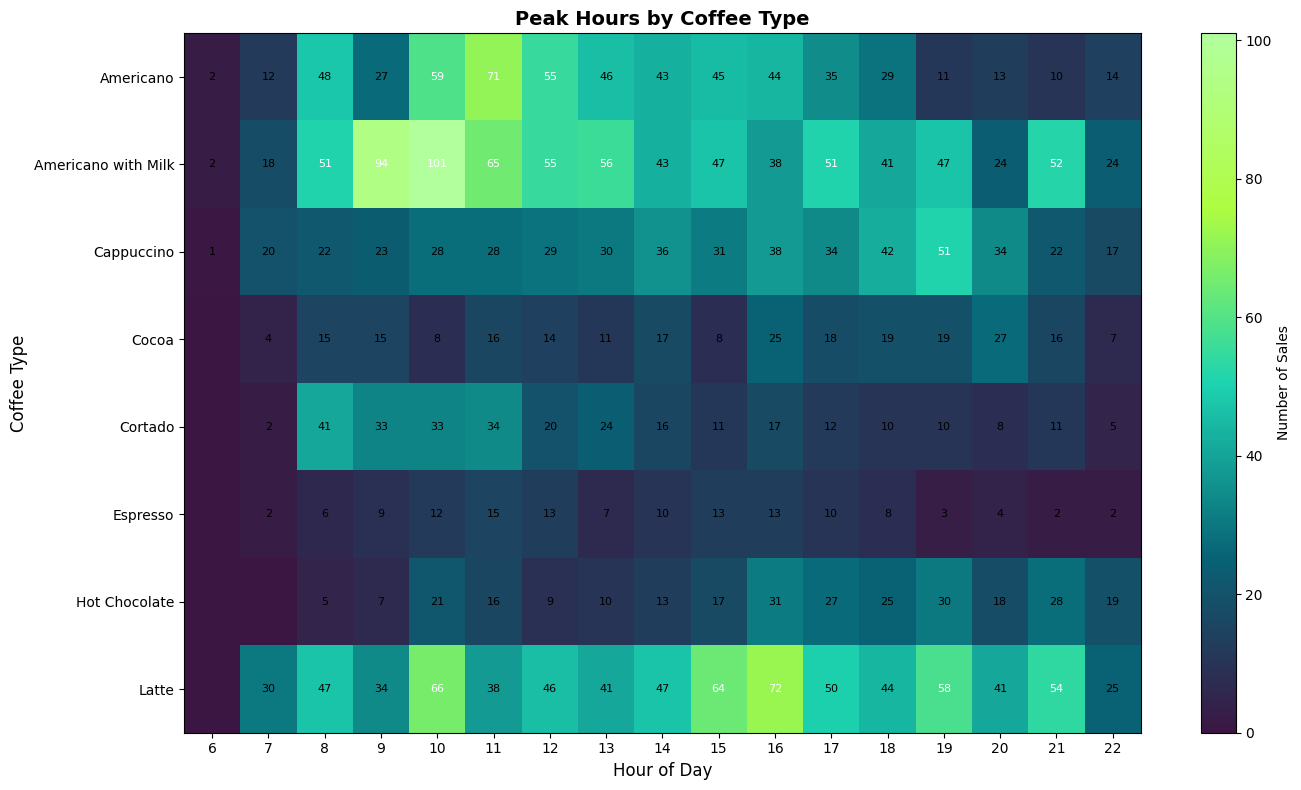

In [6]:
# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Color Map Preparation ::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Create custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_palette", palette)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Preparation :::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Create cross table: hour x coffee type
peak = df.groupby(['hour_of_day', 'coffee_name']).size().unstack(fill_value=0)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Data Visualization :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.figure(figsize=(14, 8))
plt.imshow(peak.T, cmap=custom_cmap, aspect='auto')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Cell Values and Annotations ::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
# Add values in cells
for i in range(len(peak.columns)):
    for j in range(len(peak.index)):
        value = peak.iloc[j, i]
        if value > 0:
            plt.text(j, i, int(value), ha='center', va='center', 
                    color='black' if value < peak.max().max()/2 else 'white',
                    fontsize=8)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Color Bar and Labels :::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.colorbar(label='Number of Sales')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Text and Titles ::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.title('Peak Hours by Coffee Type', fontsize=14, fontweight='bold')

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Axis Configuration :::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.xticks(range(len(peak.index)), peak.index)
plt.yticks(range(len(peak.columns)), peak.columns)

# ::::::::::::::::::::::::::::::::::::::::::::::::
# ::::::::: Render :::::::::::::::::::::::::::::::
# ::::::::::::::::::::::::::::::::::::::::::::::::
plt.tight_layout()
plt.show()